# Image classification: MLP vs CNN

## Introduction

In this notebook, I will make a short comparison between the use of a standard MLP (**multi-layer perceptron**, or **feed forward network**, or vanilla neural network, whatever term or nickname suits your fancy) and a CNN (**convolutional neural network**) for image recognition using supervised learning. It'll be clear that, although an MLP could be used, CNN's are much more suited for this task, since they take the dimensional information of a picture into account, something MLP's do not do.

When thinking about providing this notebook as an example, I went back and forth a few times, and ultimately decided to make it *somewhat* beginner-friendly. Thus, I will provide explanations of some basic concepts like perceptrons, layers, logistic regression, activation or cost functions, gradient descent, overfitting and possible counter-measures against it, and so on. Don't expect a full in-depth tutorial about the full theory behind it all though. There are nowadays so many courses to be found, like the ones in the [Udacity School of AI](https://eu.udacity.com/school-of-ai) (which I highly recommend!), or [Coursera Machine Learning](https://www.coursera.org/learn/machine-learning), where you can learn all about the basic concepts and even implement some examples. Now, I don't have too much in-depth experience with online AI courses other than from those 2 sources, but what I did notice when looking at other courses is that a lot of them do explain the core concepts and theory behind it all, but fail to convert that into actual applicable skills (the Udacity ones being an exception to that, again, invest in them, they are well worth it).

So what I decided to go for is to limit the theory and focus on application with this notebook. I will explain some concepts from time to time, but you'd do best to build up some basic theoretical knowledge about core concepts. Together with the explanation I will give here, that should be enough to understand what is going on. If you really want to fully comprehend every single detail here (and preferably much more than that), be realistic and dig further and deeper. The courses I referred to above are very interesting and quite thorough (although of course they are also only the beginning of this broad topic). Explaining everything that goes on is not something that is doable in a short little notebook. I just hope to demonstrate some interesting stuff, explain some concepts, and ultimately, to entice you to start learning more about this amazing field of technology.

## The tools

All code in the notebook is obviously Python. In order to build the neural networks and do the training, I used [Keras](https://keras.io), with [TensorFlow](https://www.tensorflow.org/) as the backend. I went with TensorFlow-GPU to be more specific (to shorten the training time). Of course you can use the standard version of TensorFlow that will run on the CPU, but that will definitely take a bit more time. Alternatively, run this notebook in the cloud. AWS is a good start, they have several GPU machine learning options to choose from. Other Python libraries I used are [NumPy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/), which are basically the usual suspects when doing this line of work. You can check out the [GitHub link](https://github.com/tomvanschaijk/mlp_vs_cnn) to the repository, where you will find this particular notebook, together with the requirements.txt file that you can use to set up the virtual environment, so that you can start playing around with the notebook for yourself.

## The dataset

As you know (or maybe not, just take my word for it), having a clean, complete data set is very important, so in order to avoid most of the clean-up and preprocessing steps, and focus on the actual neural network, I used a prepared example, namely the **CIFAR10** dataset,  which is included in the installation of Keras. This dataset consists of 50.000 (that's 50,000 for you using a dot as a decimal separator) 32x32 pixel color training images, labeled over 10 categories, and 10k (see how I avoided the formatting problem there?) test images. Why we have training and testing images, and what that means, I'll touch on shortly in a minute.

## MLP

Let's start with a basic explanation of what an MLP actually is. In fact, the description "multi-layer perceptron" pretty much says it all (and says nothing at the same time). I trust the "multi-layer" part will sort itself out from the moment you know a bit more about what a perceptron is. Here it is for you: a perceptron is quite simply the most basic neural network you can think of. You probably already know, like a biological neuron having dendrites, a cell body and an axon, like this charming specimen:

![neuron](images/neuron.jpg)

the equivalents of that for an artificial neuron are the input channels, a processing stage, and an output, as displayed here:

![Perceptron](images/singleperceptron.png)

What happens here, is really rather simple (and I'm going to speed through this, so sit tight): image a simple function with a number of inputs x<sub>1</sub>, x<sub>2</sub>, ... all the way to x<sub>n</sub>. When the inputs come in, each gets multiplied by the weight value that is assigned to the particular input: so x<sub>1</sub> gets multiplied by w<sub>1</sub>, x<sub>2</sub> by w<sub>2</sub> and so on. All the resulting values are then summed up to a single value. We also have what's called a bias (nothing crazy, it's like the constant in linear regression), which is also added to the sum. Finally, the result of these calculations has to be turned into an output signal. This is done by feeding the result to an **activation function**.

The activation function in the last step, designated with the funny Greek symbol (just say **sigmoid**), is the function that will transform the result of the processing of our inputs to a signal for the outside world. That statement in and of itself doesn't help much, I realize that. But think about what an axon in a biological neuron does. It "fires" a response or output, or it does not. The same must happen for our artificial neuron. The result of the calculation inside the neuron could be anything ranging from -inf to +inf. After all, we receive several inputs, which we then have to combine with the weights we chose, and add the results of those multiplications (and the bias) to get one single numeric result. Inside of the neuron, it doesn't really matter what that result looks like or how big or small it is, but we obviously care, since we are actually trying to make the perceptron do something. 

The most basic use case is simple classification into 2 categories. So for example: if the result of the function is above a certain value, classify in one category. Otherwise, designate the other category. So, in reality, we are outputting a **probability**. We want to check the probability that the result of our function makes a certain set of input variables end up in one or the other category. So we use a sigmoid function for that (in this case, the logistic function as displayed below this paragraph), which takes any value and transforms it to a value between 0 and 1, which is basically our probability. There are many other activation functions (softmax for multiple classification, reactive linear unit or relu, hyperbolic tangent, ...), each with their own uses and properties. I'm not going to go deep into those, there are several sources out there to learn more about them. For now: you'll find below how the logistic sigmoid function looks like, in formula and in a chart.

![Sigmoid](images/logisticsigmoid.jpg)

So, in very simple terms, that is what a perceptron is and does. So what can you do with it? Well, as I told you above, you could use it to do 2-class classification. For example, to predict whether a student passes a course based on the points he or she scored on several tests. Or you could emulate AND, OR, or NOT functions. They basically do the same thing, right? Based on a number of inputs (for example: TRUE, FALSE, FALSE, TRUE, TRUE) you determine whether the end result of applying a logical operator to those inputs, results in the output being TRUE or FALSE. So you could take a dataset of the results of applying, for example, the AND function to 4 input variables (each having the value TRUE or FALSE), and predict for any combination of 4 values whether the output is TRUE or FALSE. Or translated to neural network terms: given 4 input variables, what is the probability of the output being TRUE?

Now, at the start, all neurons have random weights and a random bias. In an **iterative process** called **feedforward** and **backpropagation**, the weights and biases are gradually shifted so that each consecutive result is a bit closer to the desired output. In this fashion, the neural network gradually moves towards a state where the desired patterns are “learned”. That is, in one of the most extreme nutshells, what the process is all about. If you require a bit more detail, look up **loss function** (which is how we determine how "off" our network is in its estimations. and of course **feed forward**, ** back propagation**

So what about the "multi-layer" part? Well, it's clear that a simple perceptron has a limited set of use cases. The world starts to look extremely interesting however, if we start combining them. In very simple terms we can do that by
* sending the inputs not to 1 perceptron, but to several
* treating the output of each of the perceptrons as inputs for another perceptron, or even multiple layers of perceptrons

So whereas 1 perceptron can classify an input in 2 categories, achieving (if displayed on a graph) something like this (basically finding that ideal line that separates the two blobs of points, thereby being able to categorize each new point in one of those 2 categories):

![2 class classification](images/2classification.png)

a more elaborate amalgam (I love that word) of perceptrons, orchestrated in several layers (I love English in general) as such:

![mlp](images/mlp.png)

where we see all inputs (in the first column) be **fully connected** to each neuron in the second layer (or column), which is in turn connected to each neuron in the third layer, whose inputs then go to the output layer, which then outputs a probability, could look something like this:

![hyperplane](images/hyperplane.png)

Now please realize this is all explained in very simple basic terms, in order not to complicate matters in this tutorial. In reality, this kind of MLP will quickly turn into an almost obscure brew of linear functions, activation functions, backpropagation, hyperparameter optimalization, matrix multiplications and a mix of funny terms and techniques. But in reality, it all boils down to as simple an explanation as provided above. Just with much more grimy details (that matter a lot).

## Just one more thing

Before we start diving in code, just a few words. Remember how I told you in the beginning that we did **supervised** learning? Just a quick explanation on that: this basically means that we will provide our neural network with a number of, let's say, "examples". Translated to the CIFAR10 dataset, we will initialize the weights in our network (well, TensorFlow will), and start feeding it the images in the training dataset. For each image, we will check how the network classifies it (in which of the 10 categories does it fall according to our network). No doubt, it'll screw up often in the beginning. We know it screws up, because we actually already know which category an image falls in. Those are the **labels** of the images; basically identifying its category. We will compare the prediction our network makes to the actual value. Each mistake enables us to alter the weights of the neurons in our network. Doing this often enough should lead to an increasingly more accurate estimation, until we hit a percentage of accuracy that satisfies our goals. For more details about this: look up **maximum likelihood** (which you would want to maximize) or even better **cross-entropy** (which you want to minimize, and is more interesting to calculate because sums are better than multiplications, and logarithms are easier as well - just look it up, you'll get what I mean). While you're at it, look up **logistic regression** and **gradient descent** which will clarify much more.

Lastly, I just mentioned "a percentage of accuracy that satisfies our goals". So what is satisfactory in this short little example? Well, we know we have 10 categories, which implies that random guessing would lead to an accuracy of 10%, right? So as far as I'm concerned, anything substantially higher than than - let's say 20-25% - at the very least demonstrates the merrit of the idea. We'll be testing our network on the testing set of 10k images, so if our network classifies 2500 of those correctly, we're at least on to something. Just keep that in mind ;-)

## Enough talk, show me the code!

Remember how I said in the introduction I would like to keep this as practical as possible? Now scroll up. So much for promises, right? But trust me, I can't really make it much shorter than that. But this is where the fun starts. I'll guide you through every part of the code, explain what it does and why I decided to do it like that. We will first start with the MLP implementation. After that, it's time to explain just a bit more for you to understand the CNN example. In the end, I'll display the results of both approaches and you'll see the difference is quite substantial. So, at long last, here we go!

## Some general stuff

Let's first do some imports, define some functions regardless of the MLP or CNN implementation, just go get them out of the way:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple as nt

Data = nt("Data", "x_train y_train x_valid y_valid x_test y_test")
%matplotlib inline

As you see, hardly anything crazy occurs here. We import NumPy and Matplotlib on the first 2 lines. On line 3, I import namedtuple from the collections library, which I use on line 5 to define my own little type. I do this because, in the end, I will need 3 sets of input x's, and 3 sets of y labels: 1 to do the training, 1 to validate my progress during training, and 1 to test the quality of my network after the training. Just storing it in one simple data variable is just handy. I could have used a tuple, but being  able to call these things by name makes life so much easier. The last line just tells Matplotlib to spit out the created plots in place in the notebook.

In [11]:
def visualize_data(data):
    images_to_show = 36
    per_row = 12
    fig = plt.figure(figsize=(20,5))
    for i in range(images_to_show):
        pos = (i // per_row, ((i % per_row) + per_row) % per_row)
        ax = plt.subplot2grid((int(images_to_show / per_row), per_row), pos, xticks=[], yticks=[])
        ax.imshow(np.squeeze(data.x_train[i]))
    plt.show()

This is a very simple little function that I will use to display 36 of the images in the CIFAR10 dataset, just so you can see what we are working with.

In [12]:
# A chart showing how the accuracy for the training and tests sets evolved
def visualize_training(hist):
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()
    
    # A chart showing our training vs validation loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

After the training, I will display a chart where you see how the training process occurs, how the **error loss** decreases and the accuracy increases with each **epoch** (quickly snuck in a new term there; an epoch is an iteration during which all training samples are passed through the network, and the weights are updated with backpropagation). This function just takes the entire training history and displays the charts where we can see the accuracy and loss of the training and validation sets.

## MLP implementation

That's it for the helpers, that wasn't so bad right? From here on, it's all MLP related code, so hold on tight!

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.datasets import cifar10

What happens here? Well, we import everything from Keras that we need. We will use the Sequential model (another option is the API, but right now, the Sequential model is enough), since our neural network will simply be a linear ordering of layers. Furthermore, the layers we will actually use are Dense (fully connected), Activation (to perform our activation function such as sigmoid, relu, ...), Flatten (that will flatten out our dataset to a vector), Dropout (a regularization technique that will prevent overfitting). I will refrain from explaining more about these layers, which may be a bit annoying to you, but explaining it all in detail would make this notebook just too big. Just the activation functions or **regularization** techniques alone would fill several chapters of a well-sized textbook, so know that they are extremely important. The same goes for the SGD optimizers (again, chapters to be filled with this, and all the **hyperparameter optimization** that goes on there). From the keras.utils libary we dig up the to_categorical function, which we will use to perform **one-hot encoding**. Obviously you want to know what that is, so I suggest you look it up. The short version is that it is a data preprocessing step that converts categorical variables into a form that could be provided to a machine learning algorithm to do a better job in prediction. In our example we have 10 categories, right? So you can image a column being filled with data from 0 to 9, each depicting the category id. In order for the algorithms to be able to take this data into account, you convert this one column to 10 columns, each having a 0 or a 1, whether or not the image belongs to that category. Again, in a nutshell. The last line imports the CIFAR10 dataset in our program.

In [14]:
def preprocess(data, categories):
    x_train = data.x_train.astype("float32") / 255
    x_test = data.x_test.astype("float32") / 255
    y_train = to_categorical(data.y_train, categories)
    y_test = to_categorical(data.y_test, categories)    
    return Data(x_train[5000:], y_train[5000:],
                x_train[:5000], y_train[:5000],
                x_test, y_test)

I alluded to it before, but data preprocessing is pretty much everything in deep learning. No matter how great of an architecture (which layers, how many,...) we create, pushing poorly optimized or incorrect data through it can pretty much render your results useless. Even with our nicely clean up dataset that Keras gives us, we need to massage it in such a way that our MLP can work with it. Our images are 32x32 pixels (one for each color channel in RGB), with a value between 0 and 255 for each pixel. Now, since we are going to do a massive amount of multiplication, we want to convert our values to floats, and divide by 255 so we have a value we can work with that won't explode with each iteration or calculation. So we do that for the training and test values. Concerning our labels (the categories in this case), we perform one-hot encoding on them. In the end we return our preprocessed input data and labels as a variable of our predefined type. Note that we select the first 5000 images as validation data, and the first 45000 as training data. Our validation data is used to measure the accuracy during training on a different set that the actual training data. Our test data will be used to run the whole neural network against data it never even saw before, in order to have a true test of quality.

In [15]:
def build_mlp(data, categories):
    # Create model architecture
    model = Sequential()
    model.add(Flatten(input_shape=data.x_train.shape[1:]))
    model.add(Dense(1000, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(categories, activation="softmax"))
    
    # Compile the model
    model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
    return model

This function is what builds the actual neural network architecture. It receives the data that we got from the preprocess function, as well as the number of categories (labels). Just following the code demonstrates the easy Keras API. We create a Sequential neural network in the first line. Then we add a Flatten layer. This is a fundamental difference between the MLP and a CNN: an MLP uses simple data vectors, arrays if you will, with the x-values of every input image provided. Because our image is a 32x32 matrix, we need to convert it to a flattened vector. That's what the Flatten layer does for us. It requires (like any first layer in the model would) the input shape. The shape of x_train is 45000x32x32x3 since we have 45000 images of 32x32 pixels with 3 values (RGB) each. That will then get flattened to one long array of numbers. After that we add a Dense (fully connected) layer with 1000 neurons (why 1000? I can only say hyperparameter optimization is an interesting topic, and this is just an example). The activation function (the function that will be performed on the result of multiplying all x-values with their weights, and then adding them up and adding the bias) is the relu function. I won't go too deep into it, but what it does for a certain x value is: if the value is lower than 0, return 0. Otherwise return x. So it gives the max of 0 and x.
After that we get a Dropout layer with a parameter of 0.2. In short, a Dropout layer with, for example, 0.2 as an argument will result in a 20% chance that either neuron will be disregarded from the training in each epoch. This is a countermeasure against overfitting (which you should definitely look up). After those 2 layers, we get another fully connected layer, followed by another Dropout. At the end, the last Dense layer contains "categories" amount of neurons. We know that will be 10, since those are the number of categories. So each of those neurons will output the probability of the input image being that category. The "softmax" activation function is a multiclass categorization function. A simple search online will explain you what the formula is, and why (btw, e = 2.7182818 - and then some). We compile the model with the categorical_crossentropy loss function (this is the error function we will use to judge the quality of the model, basically the accuracy of the weights of our equations), and rmsprop as optimizer. RmsProp is only one of the optimizers avaible in Keras, there are multiple available such as Adam, Adagrad, ..., each of which have several hyperparameters such as **learning rate**, **learning rate decay**, ways to deal with local minima and so on.

In [16]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
data = Data(x_train, y_train, None, None, x_test, y_test)

So, with those functions out of the way, it's time to get going. First up: loading the data and filling our predefined datatype variable, nothing complex going on here.

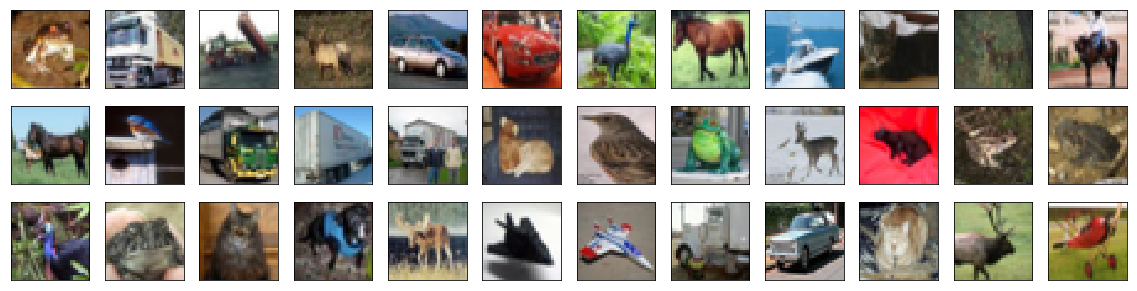

In [17]:
# Visualize the data
visualize_data(data)

Let's have a glimpse at our data. I think you can quite easily identify some categories here. Trucks, cars, horses, frogs, cats. Now you know what we are working with. These are the images we want our network to identify. Just by giving it the values of the pixels in the RGB range.

In [18]:
# Preprocess the data
categories = len(np.unique(data.y_train))
print("Shape of x_train pre-processing: ", data.x_train.shape)
print("Shape of y_train pre-processing: ", data.y_train.shape)
processed_data = preprocess(data, categories)
print("Shape of x_train post-processing: ", processed_data.x_train.shape)
print("Shape of y_train post-processing: ", processed_data.y_train.shape)
print("Shape of x_valid post-processing: ", processed_data.x_valid.shape)
print("Shape of y_valid post-processing: ", processed_data.y_valid.shape)
print("Shape of x_test post-processing: ", processed_data.x_test.shape)
print("Shape of y_test post-processing: ", processed_data.y_test.shape)

Shape of x_train pre-processing:  (50000, 32, 32, 3)
Shape of y_train pre-processing:  (50000, 1)
Shape of x_train post-processing:  (45000, 32, 32, 3)
Shape of y_train post-processing:  (45000, 10)
Shape of x_valid post-processing:  (5000, 32, 32, 3)
Shape of y_valid post-processing:  (5000, 10)
Shape of x_test post-processing:  (10000, 32, 32, 3)
Shape of y_test post-processing:  (10000, 10)


After loading the data, of course we need to do some preprocessing to make it usable. I displayed the dimensions for your viewing pleasure. Can you make sense of them? We start out with the 50000 32x32 pixel RGB images as x_train data, and their 50000 labels. After preprocessing, we transformed the pixels to floats between 0 and 1, and spliced the training set into a training of 45000 and a validation of 5000 images. The labels get one-hot encoded and are no longer a 50000x1 matrix, but a 50000x10 (one column for each category. 9 of those will contain a 0, 1 will contain a 1). Our data is ready to pump through the network!

In [19]:
# Build mlp
mlp = build_mlp(processed_data, categories)
print("MLP architecture:")
mlp.summary()

MLP architecture:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 3,590,642
Trainable params: 3,590,642
Non-trainable params: 0
________________________________________________

Here we call on the build_mlp function we built earlier. Do you understand the MLP architecture? Let's go over it together:
* The flatten layer receives each image as a 32x32x3 matrix, which it flattens to a vector of length 3072. No trainable parameters here, this is getting the image ready for our dense layers.
* Our first dense layer had 1000 neurons, remember? That means that each of the 3072 x-values will get multiplied with 3072 weights in a 1000 linear functions (because a dense layer is fully connected, so every node in one layer will be connected to every node in the next layer). But 3072x1000 is 3072000, so we are missing some. Those are the biases, remember those? So it's not 3072 values, but 3073, which will result in 3073000 parameters. That's 3073000 weights ready to be trained.
* Then we have our first dropout layer. That'll do what I explained above, with a likelihood of 20%.
* Next up, another dense layer, in which each of the 512 nodes will receive the 1000 output x-values (+ a bias) of the previous layer, giving us 512x1001=512512 trainable parameters. That's starting to add up, don't you think..?
* Another dropout, you know this by now, judging from the amount of parameters, I guess you understand why it's good to use.
* The last dense layer is our output layer. We have 10 categories, so 10 neurons, each outputting the probability of an image being in that category. So, our 512 (+bias) parameters get thrown in each of those, giving us 10x513=5130 weights ready to be optimized.

Adding all those up will result in the amount of parameters that are so finely summed up for you by Keras. I think you agree that's a LOT of work to be done. Starting to see the problem..? 

In [20]:
mlp_weights_path = "saved_weights/cifar10_mlp_best.hdf5"

In [21]:
# Train the mlp
checkpointer_mlp = ModelCheckpoint(filepath=mlp_weights_path, verbose=1, save_best_only=True)
hist_mlp = mlp.fit(processed_data.x_train, processed_data.y_train, batch_size=32, 
                   epochs=100, validation_data=(processed_data.x_valid, processed_data.y_valid),
                   callbacks=[checkpointer_mlp], shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 16s 363us/step - loss: 2.3716 - acc: 0.2681 - val_loss: 1.8359 - val_acc: 0.3244

Epoch 00001: val_loss improved from inf to 1.83592, saving model to saved_weights/cifar10_mlp_best.hdf5
Epoch 2/100
45000/45000 [==============================] - 15s 326us/step - loss: 1.8408 - acc: 0.3366 - val_loss: 1.7210 - val_acc: 0.3926

Epoch 00002: val_loss improved from 1.83592 to 1.72102, saving model to saved_weights/cifar10_mlp_best.hdf5
Epoch 3/100
45000/45000 [==============================] - 17s 373us/step - loss: 1.7929 - acc: 0.3569 - val_loss: 1.7979 - val_acc: 0.3288

Epoch 00003: val_loss did not improve from 1.72102
Epoch 4/100
45000/45000 [==============================] - 14s 320us/step - loss: 1.7738 - acc: 0.3618 - val_loss: 1.8870 - val_acc: 0.3472

Epoch 00004: val_loss did not improve from 1.72102
Epoch 5/100
45000/45000 [==============================] - 23s 522us/step

45000/45000 [==============================] - 14s 319us/step - loss: 1.8176 - acc: 0.3727 - val_loss: 1.9853 - val_acc: 0.3522

Epoch 00042: val_loss did not improve from 1.67425
Epoch 43/100
45000/45000 [==============================] - 14s 319us/step - loss: 1.8214 - acc: 0.3737 - val_loss: 1.8121 - val_acc: 0.3860

Epoch 00043: val_loss did not improve from 1.67425
Epoch 44/100
45000/45000 [==============================] - 14s 320us/step - loss: 1.8148 - acc: 0.3740 - val_loss: 1.8437 - val_acc: 0.3804

Epoch 00044: val_loss did not improve from 1.67425
Epoch 45/100
45000/45000 [==============================] - 14s 320us/step - loss: 1.8186 - acc: 0.3702 - val_loss: 1.7880 - val_acc: 0.3664

Epoch 00045: val_loss did not improve from 1.67425
Epoch 46/100
45000/45000 [==============================] - 14s 320us/step - loss: 1.8260 - acc: 0.3711 - val_loss: 2.6034 - val_acc: 0.3294

Epoch 00046: val_loss did not improve from 1.67425
Epoch 47/100
45000/45000 [======================


Epoch 00084: val_loss did not improve from 1.67425
Epoch 85/100
45000/45000 [==============================] - 14s 319us/step - loss: 1.8792 - acc: 0.3572 - val_loss: 3.0403 - val_acc: 0.2748

Epoch 00085: val_loss did not improve from 1.67425
Epoch 86/100
45000/45000 [==============================] - 14s 318us/step - loss: 1.8978 - acc: 0.3564 - val_loss: 1.9458 - val_acc: 0.3354

Epoch 00086: val_loss did not improve from 1.67425
Epoch 87/100
45000/45000 [==============================] - 14s 319us/step - loss: 1.8894 - acc: 0.3548 - val_loss: 1.9869 - val_acc: 0.3650

Epoch 00087: val_loss did not improve from 1.67425
Epoch 88/100
45000/45000 [==============================] - 14s 319us/step - loss: 1.8957 - acc: 0.3525 - val_loss: 2.0873 - val_acc: 0.3494

Epoch 00088: val_loss did not improve from 1.67425
Epoch 89/100
45000/45000 [==============================] - 14s 319us/step - loss: 1.8736 - acc: 0.3506 - val_loss: 1.9262 - val_acc: 0.3658

Epoch 00089: val_loss did not impr

So after we have our actual neural network structure defined, it's time to start training it. ModelCheckPoint is a handy little utility that you can use to store the weights during the training process. This enables us to load them into our network later. The fit function that we call on model takes several parameters, that I will go over shortly:
* The first argument are the x-values of the training set to be fed into our network
* The second argument are the labels, the categories that each respective x-value set should result in. Our network will make a prediction on the x-values, compare the prediction with the given label, and correct the weights in each neuron accordingly.
* batch_size: instead of pumping our dataset through the network in one go, we can make smaller batches. The size of the batch is part of hyperparameter optimization, the implications of making it large or small require some understanding, but 32 is often a good starting point. A larger value gives you boosted computational benefits because of matrix multiplication, but requires more memory, which increase the chances of running out of resources. Smaller batch sizes introduce more noise in their error calculation, which can be helpful (overcoming local minima). Experiment with 32, 64, 128 and other values depending on your application and data.
* verbose=1 says something about the degree of feedback you want during the training process
* save_best_only tells our ModelCheckPoint to only save the neuron weights when improvement is being made (in our validation set)
* epochs: just interpret this as iterations, to keep it simple. 1 epoch is equivalent to pumping the entire dataset through the network 1 single time.
* validation_data are the x-values and y-labels that we want to validate our updated network against and jugde whether things are improving
* callbacks: an array with, well guess what, callbacks to execute during training. We pass it the checkpointer to save the weights.
* shuffle: whether to shuffle the training data before each epoch

Now, if you execute this yourself in this notebook or in a program, now would be a good time to grab some coffee. This will take a bit of time. Notice we do 100 epochs, so although it's not too dramatic, your system will be busy for a bit. You can inspect the feedback of each epoch, which displays the time spent, the result of the loss function and accuracy for the training and validation sets.

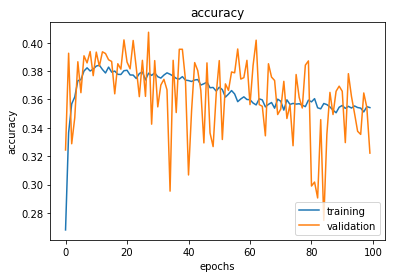

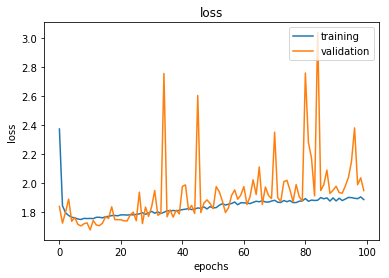

In [22]:
visualize_training(hist_mlp)

Here, we visualize our training process. We see the accuracy on our training data move around quite a bit, and the validation set jumps all across the board. Same for the loss. Basically, this type of visualization can be handy to quickly pinpoint the  exact point we pass our **goldilocks point** and we start overfitting to our training set. I'd say, in time, it's definitely getting worse. That could tell us that 100 is pretty much overkill. There are options you can set up in TensorFlow and Keras to make sure the process stops when accuracy doesn't increase for x number of epochs, so that can save you some time.

In [23]:
mlp.load_weights(mlp_weights_path)
score_mlp = mlp.evaluate(processed_data.x_test, processed_data.y_test, verbose=0)

So, after doing the entire training process, we load the optimal weights from the checkpoint file and evaluate the model with these weights against data it never even saw before, namely the test set. I know you are curious about the result, but let's save that for last, where we compare it to what our next neural network does: the convolutional neural network.

## Convolutional Neural Networks

Before jumping into the CNN implementation, we do have to hit the brake a bit, and take a look at what's not to like about the MLP implementation of this problem. As you might have guessed already, judging from the remarks I made in the MLP architecture paragraph, there were a **whole lot of parameters** to train: well over 3 million parameters. Now, that's for small images of 32x32 pixels. A natural result is that it took quite some time. Another very important disadvantage is this: we took those pixels, and we flattened them. Instead of using the nice 32x32x3 matrix of data. In short: we **disregarded the spacial properties** of images, and just threw the values in one long row. When thinking about images, that alone can hardly be ideal. Images are spacially ordered data, so we want to treat them as such. Those dimensional properties will for sure help us in classification, and enable us to achieve a higher degree of precision in our predictions. And exactly that is where CNN's come in to save the day. The bad news is that we just have to dive into a tiny bit of theory for that. This is fun stuff however, so let's go for it. We already saw the use of Dense, Dropout, Activation, Flatten layers in vanilla feed forward networks. In CNN's we will add just 2 more: Convolutional (big surprise) and Pooling layers. To make it clear what those do, we'll shortly dive into how a CNN looks at image data to perform its magic.

## Convolutional layer

First and foremost, I will keep this explanation rather short and simple. Although CNN's are not hard to understand, there's a lot that can be said about them, and I just want to communicate the basic premise of how they work, as that is the main message I want to get across.

The main takeaway is that, when using CNN's, you keep in mind the fact that image pixels that are close to eachother are more heavily related that pixels far away from eachother. So what we do not want, is to remove that spacial correlation, and "unpack" or "flatten" those pixels to a long array, as we did in the case of MLP's. A better alternative would be to keep that matrix alive and look at pixel groups in order to process the raw data points in that matrix. Spacial information matters, and that is exactly the core idea that drives Convolutional layers.

First, let's introduce the concept of a **feature**. A feature is nothing more than a small 2-dimensional array of values which represents a pattern that we are looking for. In order for a CNN to classify images, we will look for patterns in the image by scanning it piece by piece. We slide a small little 2-dimensional window (**kernel**) over the image, and we will look for features. This way, CNN's get a lot better at identifying parts of an image instead of taking the whole image in as one big chunk. Features recognize certain aspects of an image. In the case of our images, features at the start of our network could consist of horizontal, vertical or diagonal lines, and in later layers of our network, we could start recognizing ever more elaborate shapes, circles or squares, up to noses, eyes, lips, and so on.

When an image is pushed through a CNN, the network won't know where the features we are looking for will be located, so it will look for them in every possible position. In order to calculate the matches to a feature across the whole image, we make it into a filter. The actual math that is used is called **convolution**, from which Convolutional Neural Networks take their name. The simple gist of it, is that each pixel in the feature is multiplied by the value of the corresponding pixel in the image. Then all results are summed up and divided by the total number of pixels in the feature. This way we can identify matches to a certain pattern in a particular part of the image. This process is then repeated for every part in the image. Using all the outputs of those calculations, a new 2-dimensional array is created, which is in fact a filtered version of the original image, "highlighting" the specific features we are looking for. Moving through the layers, more complicated features will be identified, which looks something like this visualized:

![features](images/features.png)



An added benefit of this approach is that our layers do not need to be not fully connected. Not every node in a layer is connected to every node in a next layer. This avoids an explosion in the amount of parameters, and thus, we need to do much less work. If you don't understand this, reconsider the fact that you slide a window over an image, calculating a result using the pixels in that small window and the corresponding values of the window. Within each window position, you calculate a certain result and don't take the rest of the image into account. That only happens after you slide the window to its next position and redo the process. This principle is called **local connectivity**. An example of the actual way the calculation occurs can be seen here:

![locality](images/locality.jpg)

I hope it's somewhat clear that, by running a window of a certain small enough (another hyperparameter) size over an image and doing some simple elementwise matrix multiplications, we end up with identification of certain features, those being ever more complicated lines, shapes, and so on. Because we add several filters in each layer, we end up deepening our images. When inputting for example a 32x32x3 pixel image (32 pixels wide, 32 pixels high, and 3 layers in the case of RGB images), and throwing 16 filters at it, we end up with a 32x32x16 dimension matrix. Each layer will still represent the image, but will contain information about shapes and lines instead of simple color values.

## Pooling layer

While Convolutional layers are responsible for **deepening** an image by introducing multiple filters, Pooling layers make sure the width and height of an image get reduced. This is done by way of the same concept of sliding a window of certain dimensions over the input matrix, and outputting a value, depending on the type of Pooling layer:
* MaxPooling layers take the average of the values that the kernel is currently sliding over, and takes the maximum value there. Quite simple, using an example, this looks like the picture below, effectively cutting the width and height dimensions in half. Note the term *stride*, which is nothing more than the steps the window takes. If it is 1, the window will just slide one pixel over after selecting the largest value. In this example, the window size is 2x2 and the stride is also 2, which means we will have a total of 4 positions to move to and calculate a new result.

![maxpooling](images/maxpooling.png)

* Global pooling layers do not use a stride or kernel size, but quite simply take the average of the entire set of values in a single feature map, and outputs 1 value. This is a more extreme way of reducing dimensionality.

![globalpooling](images/globalpooling.png)


As such, the result of a Pooling layer is that a certain image gets reduced in width and height, while respecting the filters we added by using Convolutional layers. Slowly but surely, as we push through the network, our image is transformed from a matrix that is much wider and higher than it is deep, to a very small but very deep matrix, until it's ready to go to a Dense layer, which as we know already requires a 1 dimensional vector.

That's all the theoretical gibberish you'll get thrown at you! I hope you can agree it wasn't that bad, and quite interesting as well to see how a computer treats the information in an image, as compared to the way humans do it! For those waiting for more code, now's the time to put all that stuff into practice. As a summary, to hammer the point home, a complete CNN architecture could look something like the picture below. Again, realize that this explanation (even more so for CNN's than was the case for MLP's) is extremely brief and simple. Much more is to be said about all the intricacies here, but this short introduction does give you an idea of the basic concepts.


![cnn](images/cnnexample.png)

## CNN implementation

And here we are, let's implement an actual CNN. As with the MLP, I'll guide you through every step of the process. Surely, if you paid attention, some parts require much less explanation. I will provide more explanation in parts where I think it's required though, no worries. Without further yapping on, here goes:

In [24]:
from keras.layers import Conv2D, MaxPooling2D

First, we will import the 2D Convolutional and MaxPooling layers that we need to create our CNN architecture.

In [25]:
def build_cnn(data, categories):
    # Create model architecture
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=2, padding="same", activation="relu", input_shape=data.x_train.shape[1:]))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(500, activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense(categories, activation="softmax"))
    
    # Compile the model
    model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
    return model

As expected, now we start implementing the architecture of our CNN. Note that we don't have to do any special or extra preprocessing of our data, we can just start with the same preprocessed data as we used with the MLP. For starters, we again define a Sequential model. Then we add our very first Convolutional layer. This consists of 16 filters, each of which uses a 2x2 window that we will slide over our image. The padding is set to "same", which means that we will add blank pixels at the side of our images in the case that the image width and height don't enable the convolutional window to nicely cover each original image pixel block. Our activation function is again the familiar reactive linear unit, and as always we provide the training shape of 32x32x3.

After each Convolutional layer, we place a MaxPooling layer with the same window size. As you see, this combination is applied several times. The effects of this, are that the width and height of our images get reduced (basically halved because of the window size of 2x2), but dimensions get added. Over the course of the entire network we slowly convert our 32x32x3 image to a long array of numbers.

After 3 sets of Convolutional+Pooling layers, we add a Dropout layer. Since our array is at that point not yet a 1-dimensional vector, we do require a Flatten layer at this point. We connect this to a Dense layer with 500 neurons, followed by another Dropout layer and a final Dense output layer to calculate the probabilities for each of the categories using softmax. We compile the model with the categorical_crossentropy loss function, and using rmsprop as optimizer. Of course, we aim for accuracy.

In [26]:
# Build cnn
cnn = build_cnn(processed_data, categories)
print("CNN architecture:")
cnn.summary()

CNN architecture:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 64)          0  

As we did for your MLP, we print out a summary of our CNN architecture and try to explain the numbers we are seeing. Each image enters the first Convolutional layer as a 32x32x3 matrix. Remember again, that is a vast distinction from the MLP, which need a Flattened array. So our output shape here is 32x32x16, since we use 16 filters, effectively deepening the image. Concerning the amount of parameters, remember our window size was 2x2, and we convolve it over each of the 3 RGB layers. As mentioned we have 16 filters, and we shouldn't forget the biases as well. That gives us ((2x2x3)+1)x16=208 parameters. Not hardly as much as the first layer in the MLP.

Then we get our MaxPooling layer, which takes that 32x32x16 matrix and takes the maximum of each 2x2 window, for each of the 16 filters, leaving us with a 16x16x16 matrix. Onto the second Convolutional layer then. This outputs a 16x16x32 matrix, since we have 32 filters. Using the same formula for our parameters, we calculate ((2x2x16)+1)x32=2080 parameters. Feeding the 16x16x32 matrix into the next MaxPooling layer results in a 8x8x32 matrix. Getting leaner and meaner (I know that's a bad joke, I don't care). The last Convolutional window then again takes that 8x8x32 matrix and leaves the image as a 8x8x64 matrix, using ((2x2x32)+1)x64=8256 weights that we can optimize. The final MaxPooling layer thins out that image matrix even more, into a 4x4x64 matrix.

At this point, all CNN specific layers are pretty much in place. We now want to add some fully connected layers, for which we obviously need to flatten our matrix, resulting in a 1024 length array. That's no big drama by now: we squeezed out all interesting dimensional data and used it to optimize the weights. Now it's ok to flatten it out and throw a Dense layer at it. We use 500 nodes here, and 1025x500=512500 weights ready to be optimized. Again with the weights explosion, but no fear, we're nearly at the end.

After another Dropout layer to counteract overfitting, we go to the last Dense layer, which is the output layer to calculate probability for the 10 categories, which requires 5010 parameters. In total we hit around half a million parameters, which is substantially less than in the case of the MLP. Will it pay off though? Let's train the network and find out.

In [27]:
cnn_weights_path = "saved_weights/cifar10_cnn_best.hdf5"

In [28]:
# Train the cnn
checkpointer_cnn = ModelCheckpoint(cnn_weights_path, verbose=1, save_best_only=True)
hist_cnn = cnn.fit(processed_data.x_train, processed_data.y_train, batch_size=32, 
                   epochs=20, validation_data=(processed_data.x_valid, processed_data.y_valid),
                   callbacks=[checkpointer_cnn])

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 13s 294us/step - loss: 1.5986 - acc: 0.4222 - val_loss: 1.3639 - val_acc: 0.4954

Epoch 00001: val_loss improved from inf to 1.36393, saving model to saved_weights/cifar10_cnn_best.hdf5
Epoch 2/20
45000/45000 [==============================] - 12s 269us/step - loss: 1.2789 - acc: 0.5437 - val_loss: 1.2877 - val_acc: 0.5462

Epoch 00002: val_loss improved from 1.36393 to 1.28772, saving model to saved_weights/cifar10_cnn_best.hdf5
Epoch 3/20
45000/45000 [==============================] - 12s 269us/step - loss: 1.1544 - acc: 0.5919 - val_loss: 1.1322 - val_acc: 0.6340

Epoch 00003: val_loss improved from 1.28772 to 1.13218, saving model to saved_weights/cifar10_cnn_best.hdf5
Epoch 4/20
45000/45000 [==============================] - 12s 269us/step - loss: 1.0868 - acc: 0.6192 - val_loss: 0.9898 - val_acc: 0.6582

Epoch 00004: val_loss improved from 1.13218 to 0.98984, saving model to

By now, this hardly needs explanation. We define our checkpoint again, and start pushing our dataset through our CNN. Note we only use 20 epochs this time, which substantially cuts down training time as well.

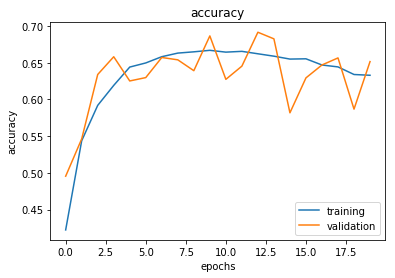

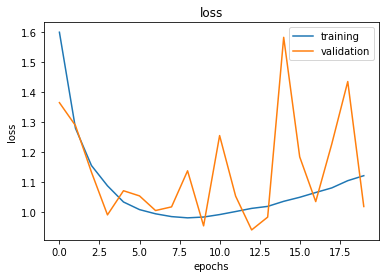

In [29]:
visualize_training(hist_cnn)

In [30]:
cnn.load_weights(cnn_weights_path)
score_cnn = cnn.evaluate(processed_data.x_test, processed_data.y_test, verbose=0)

We load up the optimized weights, and evaluate our model against our test dataset. We've seen that before. Ultimately, let's compare the accuracy of our MLP in the previous section with this CNN.

In [31]:
# Compare the scores
print("Accuracy mlp: {0:.2f}%".format(score_mlp[1] * 100))
print("Accuracy cnn: {0:.2f}%".format(score_cnn[1] * 100))

Accuracy mlp: 41.11%
Accuracy cnn: 67.58%


Well, I think the difference is pretty clear. Although the MLP didn't perform bad (way above "random guessing" levels of about 10%, which proves we are at least doing something right here), the CNN shatters those numbers, with less training time and way less parameters.

The reasons for this should be rather clear at this point. The sheer conservation of dimensional data, and the possibility to keep that into account during much of the training process obviously is crucial in recognizing the images. Achieving 67% accuracy is pretty good as a first attempt!

Can we achieve more? Obviously we can, but remember we just trained this model from scratch, in a few minutes. Our architecture is rather simple, our hyperparameters are not really optimized or researched, and we didn't even use techniques such as image augmentation or transfer learning, which would push our results to even higher levels, especially for real-life applications and more messy datasets. In short, it's safe to say that at least for this type of application, we have a clear winner.

## Concluding

So far for this little proof of concept! I do hope this sparked your interest to go and research more about deep learning, MLP's, CNN's and much more. Although it can be easily overlooked, remember what we did here! For 10000 images, using the simple 32x32x3 matrix of values between 0 and 255, we managed to determine, with an accuracy of 67%, what that image represents. That in itself is pretty awesome, especially taking into account that the network was trained in only a few minutes. That beats having to classify those 10000 images by hand I'd say.

However, there's so much more out there (RNN's, GAN's, auto-encoders, ...) to apply on an enormous amount of areas of industry, and research is still very much ongoing in most of these fields. Time to get involved! Much more fun stuff, examples and tutorials will follow in time, using deep learning/machine learning techniques such as MLP's, CNN's, RNN's, GAN's and so on, or other AI applications. Stay tuned, and by all means, give me your feedback about what you thought about this example ;-)

## And by the way

In the case of 67% accuracy does not overly impress you and you need some more persuasion, let's aim a bit higher. I will implement a few techniques I mentioned earlier already:
* data augmentation
* regularization: we'll use **L2 regularization**

I will additionaly increase the complexity of the architecture of the network by adding more layers. We'll also take more control of the optimizer that we use during the training, and will adapt the learning rate as we go. Lastly (or rather, firstly), we'll preprocess our data just a little bit differently than we did in our previous examples. I'll add the minimal explanation and will highlight some important terms you want to research in order to better understand what I'm doing there. This part of the code is more about a short demonstration about what's possible, instead of explaining fully how to achieve it.

In [32]:
from keras.layers import BatchNormalization
from keras.optimizers import rmsprop
from keras.callbacks import LearningRateScheduler, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

You clearly see what we are doing here. We import all libraries and functions that we need to perform the higher level of customization to apply to our neural network.

In [33]:
def optimized_preprocess(data, categories):
    # Z-score normalization of data
    mean = np.mean(data.x_train, axis=(0,1,2,3))
    std = np.std(data.x_train, axis=(0,1,2,3))
    x_train = ((data.x_train - mean) / (std + 1e-7)).astype("float32")
    x_test = ((data.x_test - mean) / (std + 1e-7)).astype("float32")
    y_train = to_categorical(data.y_train, categories)
    y_test = to_categorical(data.y_test, categories)    
    return Data(x_train[5000:], y_train[5000:],
                x_train[:5000], y_train[:5000],
                x_test, y_test)

Here we perform the known necessary normalization of the data. However, we don't just divide by 255 as we did before, but we use Z-score or standard score normalization. Read more about methods of normalization [here](https://en.wikipedia.org/wiki/Normalization_(statistics).

In [48]:
def learningrate_schedule(epoch):
    # We use a standard learning rate of 0.001
    # From the 51st epoch, we decrease it to 0.0007
    # From the 76th epoch, we decrease it to 0.0005
    # From the 101st epoch, we decrease it further to 0.0003
    # From the 151st epoch, we decrease it further to 0.00005
    rate = 0.001
    if epoch > 75:
        rate = 0.0005
    elif epoch > 100:
        rate = 0.0003
    elif epoch > 125:
        rate = 0.0001
    elif epoch > 150:
        rate = 0.00005
    return rate

Remember this function, we'll use it later during the training, as one of the callbacks. It implies that the learning rate starts out as being 0.001 (which is often a reasonable starting point), and as we enter the higher epochs, we change it to lower values. This is one of the ways in which we can avoid **local minima** during the gradient descent.

In [35]:
def build_optimized_cnn(data, categories):
    # Create model architecture
    weight_decay = 1e-4
    model = Sequential()
    model.add(Conv2D(32, kernel_size=3, padding="same", activation="elu",
                     kernel_regularizer=regularizers.l2(weight_decay), input_shape=data.x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size=3, padding="same", activation="elu",
                     kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, kernel_size=3, padding="same", activation="elu",
                     kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=3, padding="same", activation="elu",
                     kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, kernel_size=3, padding="same", activation="elu",
                     kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=3, padding="same", activation="elu",
                     kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(categories, activation="softmax"))

    # Compile the model, using an optimized rms this time, which we will adapt
    # during training
    optimized_rmsprop = rmsprop(lr=0.001,decay=1e-6)
    model.compile(loss="categorical_crossentropy", optimizer=optimized_rmsprop, metrics=["accuracy"])
    return model

That's a slightly more interesting architecture, isn't it? Notice the use of more 2D-convolutional layers, the kernel regularizers, batch normalization, the pool and kernel sizes, the dropout layers. This obviously builds on what we saw in the more basic cnn architecture. Be sure to research the terms that are not familiar to you:
* **kernel regularization**
* **L1 and L2 regularization**
* **batch normalization**

In [36]:
# Preprocess for optimized cnn
optimized_processed_data = optimized_preprocess(data, categories)

Not much to say here. We perform the preprocessing step as described above.

In [37]:
# Build optimized cnn
optimized_cnn = build_optimized_cnn(processed_data, categories)
print("Optimized CNN architecture:")
optimized_cnn.summary()

Optimized CNN architecture:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64) 

Here we build our more advanced cnn (at least in terms of architecture, we'll see about the results later). As you see, there's quite a bit more going on, and we have quite a few parameters again.

In [38]:
# Perform data augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.15, height_shift_range=0.15, horizontal_flip=True)
datagen.fit(optimized_processed_data.x_train)

Here you can see one of the new concepts in the wild: data augmentation. In short, what we do is rotate, shift and flip the images, thereby introducting more variation in our dataset, so that our network could generalize beter. That's, in a single simple sentence, what data augmentation is about. Read more about how to do it in Keras [here](https://keras.io/preprocessing/image/).

In [49]:
# Train the optimized cnn
batch_size = 64
optimized_cnn_path_best = "saved_weights/optimized_cifar10_cnn_best.hdf5"
checkpointer_optimized_cnn = ModelCheckpoint(optimized_cnn_path_best, verbose=1, save_best_only=True)
hist_optimized_cnn = optimized_cnn.fit_generator(datagen.flow(optimized_processed_data.x_train, optimized_processed_data.y_train, batch_size=batch_size),
                                                 steps_per_epoch=optimized_processed_data.x_train.shape[0] // batch_size, epochs=200,
                                                 verbose=0,validation_data=(optimized_processed_data.x_valid, optimized_processed_data.y_valid),
                                                 callbacks=[checkpointer_optimized_cnn, LearningRateScheduler(learningrate_schedule),
                                                            EarlyStopping(min_delta=0.001, patience=40)])
optimized_cnn.load_weights(optimized_cnn_path_best)
score_optimized_cnn = optimized_cnn.evaluate(optimized_processed_data.x_test, optimized_processed_data.y_test, verbose=0)


Epoch 00001: val_loss improved from inf to 0.54890, saving model to saved_weights/optimized_cifar10_cnn_best.hdf5

Epoch 00002: val_loss did not improve from 0.54890

Epoch 00003: val_loss improved from 0.54890 to 0.51041, saving model to saved_weights/optimized_cifar10_cnn_best.hdf5

Epoch 00004: val_loss did not improve from 0.51041

Epoch 00005: val_loss did not improve from 0.51041

Epoch 00006: val_loss did not improve from 0.51041

Epoch 00007: val_loss did not improve from 0.51041

Epoch 00008: val_loss did not improve from 0.51041

Epoch 00009: val_loss did not improve from 0.51041

Epoch 00010: val_loss did not improve from 0.51041

Epoch 00011: val_loss did not improve from 0.51041

Epoch 00012: val_loss did not improve from 0.51041

Epoch 00013: val_loss did not improve from 0.51041

Epoch 00014: val_loss did not improve from 0.51041

Epoch 00015: val_loss did not improve from 0.51041

Epoch 00016: val_loss did not improve from 0.51041

Epoch 00017: val_loss did not improve


Epoch 00137: val_loss did not improve from 0.41090

Epoch 00138: val_loss did not improve from 0.41090

Epoch 00139: val_loss did not improve from 0.41090

Epoch 00140: val_loss did not improve from 0.41090

Epoch 00141: val_loss did not improve from 0.41090

Epoch 00142: val_loss did not improve from 0.41090

Epoch 00143: val_loss did not improve from 0.41090

Epoch 00144: val_loss did not improve from 0.41090

Epoch 00145: val_loss did not improve from 0.41090

Epoch 00146: val_loss did not improve from 0.41090

Epoch 00147: val_loss did not improve from 0.41090

Epoch 00148: val_loss did not improve from 0.41090

Epoch 00149: val_loss did not improve from 0.41090

Epoch 00150: val_loss did not improve from 0.41090

Epoch 00151: val_loss improved from 0.41090 to 0.41015, saving model to saved_weights/optimized_cifar10_cnn_best.hdf5

Epoch 00152: val_loss did not improve from 0.41015

Epoch 00153: val_loss did not improve from 0.41015

Epoch 00154: val_loss did not improve from 0.410

Our training takes place here. We define the batch size to be 64, and prepare our checkpoint to save the best weights. the fit function has been replaced by a fit_generator function, since we use our data generator. That's also the reason while we use the datagen.flow function instead of simply presenting the datasets x and y values. Also notice the addition of a LearningRateScheduler (refering to our function learningrate_schedule) to the callbacks. You can imagine what's happening there. The EarlyStopping callback stops our training if there was no improvement for 40 epochs. What can be seen as "improvement" is defined by the min_delta parameter. Look at the amount of epochs as well. Obviously this training will take a bit more time. I changed the verbose parameter to 0, so you will only see the result of each epoch.

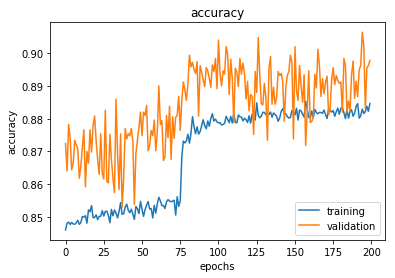

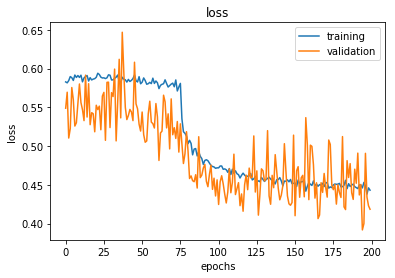

In [50]:
visualize_training(hist_optimized_cnn)

In [51]:
print("Accuracy optimized cnn: {0:.2f}%".format(score_optimized_cnn[1] * 100))

Accuracy optimized cnn: 89.16%


And the moment of truth: printing our achieved degree of accuracy. I leave you with that, and I hope this sparked your eagerness to learn about this amazing topic even more.